   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


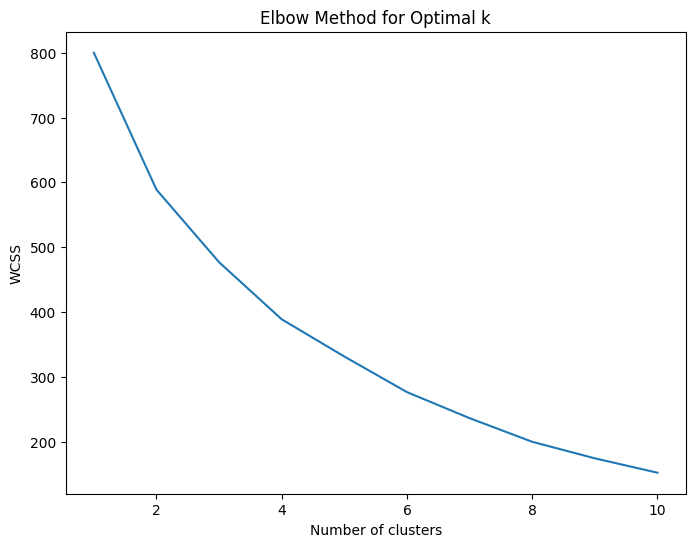

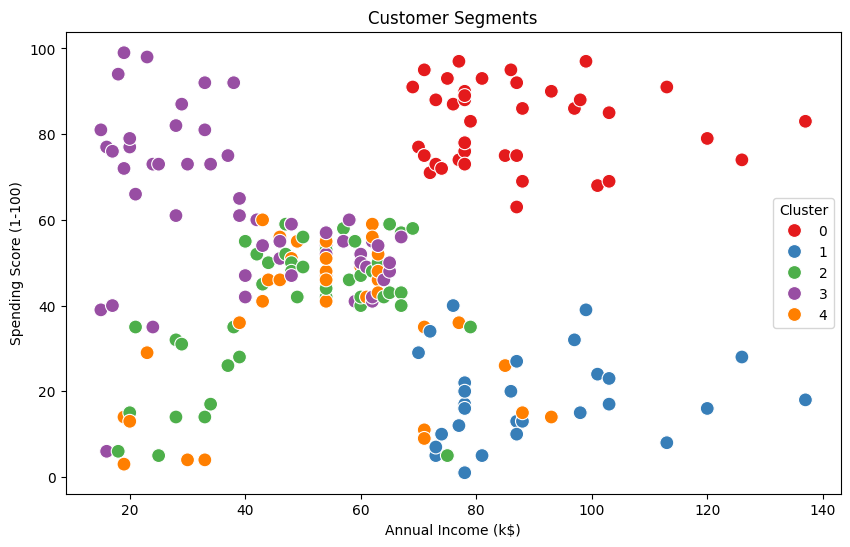

Centroids: 
[[ 4.61538462e-01  3.26923077e+01  8.65384615e+01  8.21282051e+01]
 [ 4.48275862e-01  3.64827586e+01  8.95172414e+01  1.80000000e+01]
 [-5.55111512e-17  4.98139535e+01  4.92325581e+01  4.00697674e+01]
 [ 4.07407407e-01  2.49074074e+01  3.97222222e+01  6.12037037e+01]
 [ 1.00000000e+00  5.57142857e+01  5.36857143e+01  3.67714286e+01]]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



# Load the dataset from your file path
df = pd.read_csv(r"C:\Users\user\Mall_Customers.csv")

# Display first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop columns that are not needed for clustering
df = df.drop(columns=['CustomerID'])

# Standardize the data (important for clustering)
scaler = StandardScaler()

# Encode categorical 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow method, choose the number of clusters (for example, 5)
optimal_clusters = 5

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)

# Add the cluster column to the dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Show the centroids of the clusters
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)  # Scale back to original scale
print(f"Centroids: \n{centroids}")